# 모듈 불러오기

In [2]:
import openpyxl

#### 기본

In [3]:
import numpy as np
import pandas as pd
import glob

#### 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 시각화 세팅, 함수

In [5]:
marker='o'
color='black'
title_size = 15

In [6]:
def linegraph(df, title='제목 입력하기', rotation=0, path='./img/인구'):
    plt.plot(df, marker=marker, color=color)
    plt.xticks(rotation=rotation)
    plt.title(title, size=title_size)
    plt.tight_layout()
    plt.savefig(f'{path}/{title}.png')
    plt.show()

# 전처리

In [7]:
path = f'../../data/인구/서울시 동별 인구밀도 2022.xlsx'
df = pd.read_excel(path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별(1)   2 non-null      object
 1   동별(2)   27 non-null     object
 2   동별(3)   453 non-null    object
 3   2022    453 non-null    object
 4   2022.1  453 non-null    object
 5   2022.2  453 non-null    object
dtypes: object(6)
memory usage: 21.4+ KB


In [9]:
df.tail(2)

,동별(1),동별(2),동별(3),2022,2022.1,2022.2
451,NaN,NaN,상일1동,39178,2.65,14784
452,NaN,NaN,상일2동,11933,0.54,22098


# 서울시 자치구별 인구밀도 2022 시각화

In [47]:
gu_df = df[~df['동별(2)'].isna()].iloc[2:, 1:].set_index('동별(2)', drop=True).drop('동별(3)', axis=1).sort_values('2022.2', ascending=False)

In [48]:
gu_df.columns = ['인구수', '면적 (㎢)', '인구밀도']

In [49]:
gu_df.tail(2)

,인구수,면적 (㎢),인구밀도
동별(2),,,
서초구,408451,46.98,8694
종로구,152211,23.91,6366


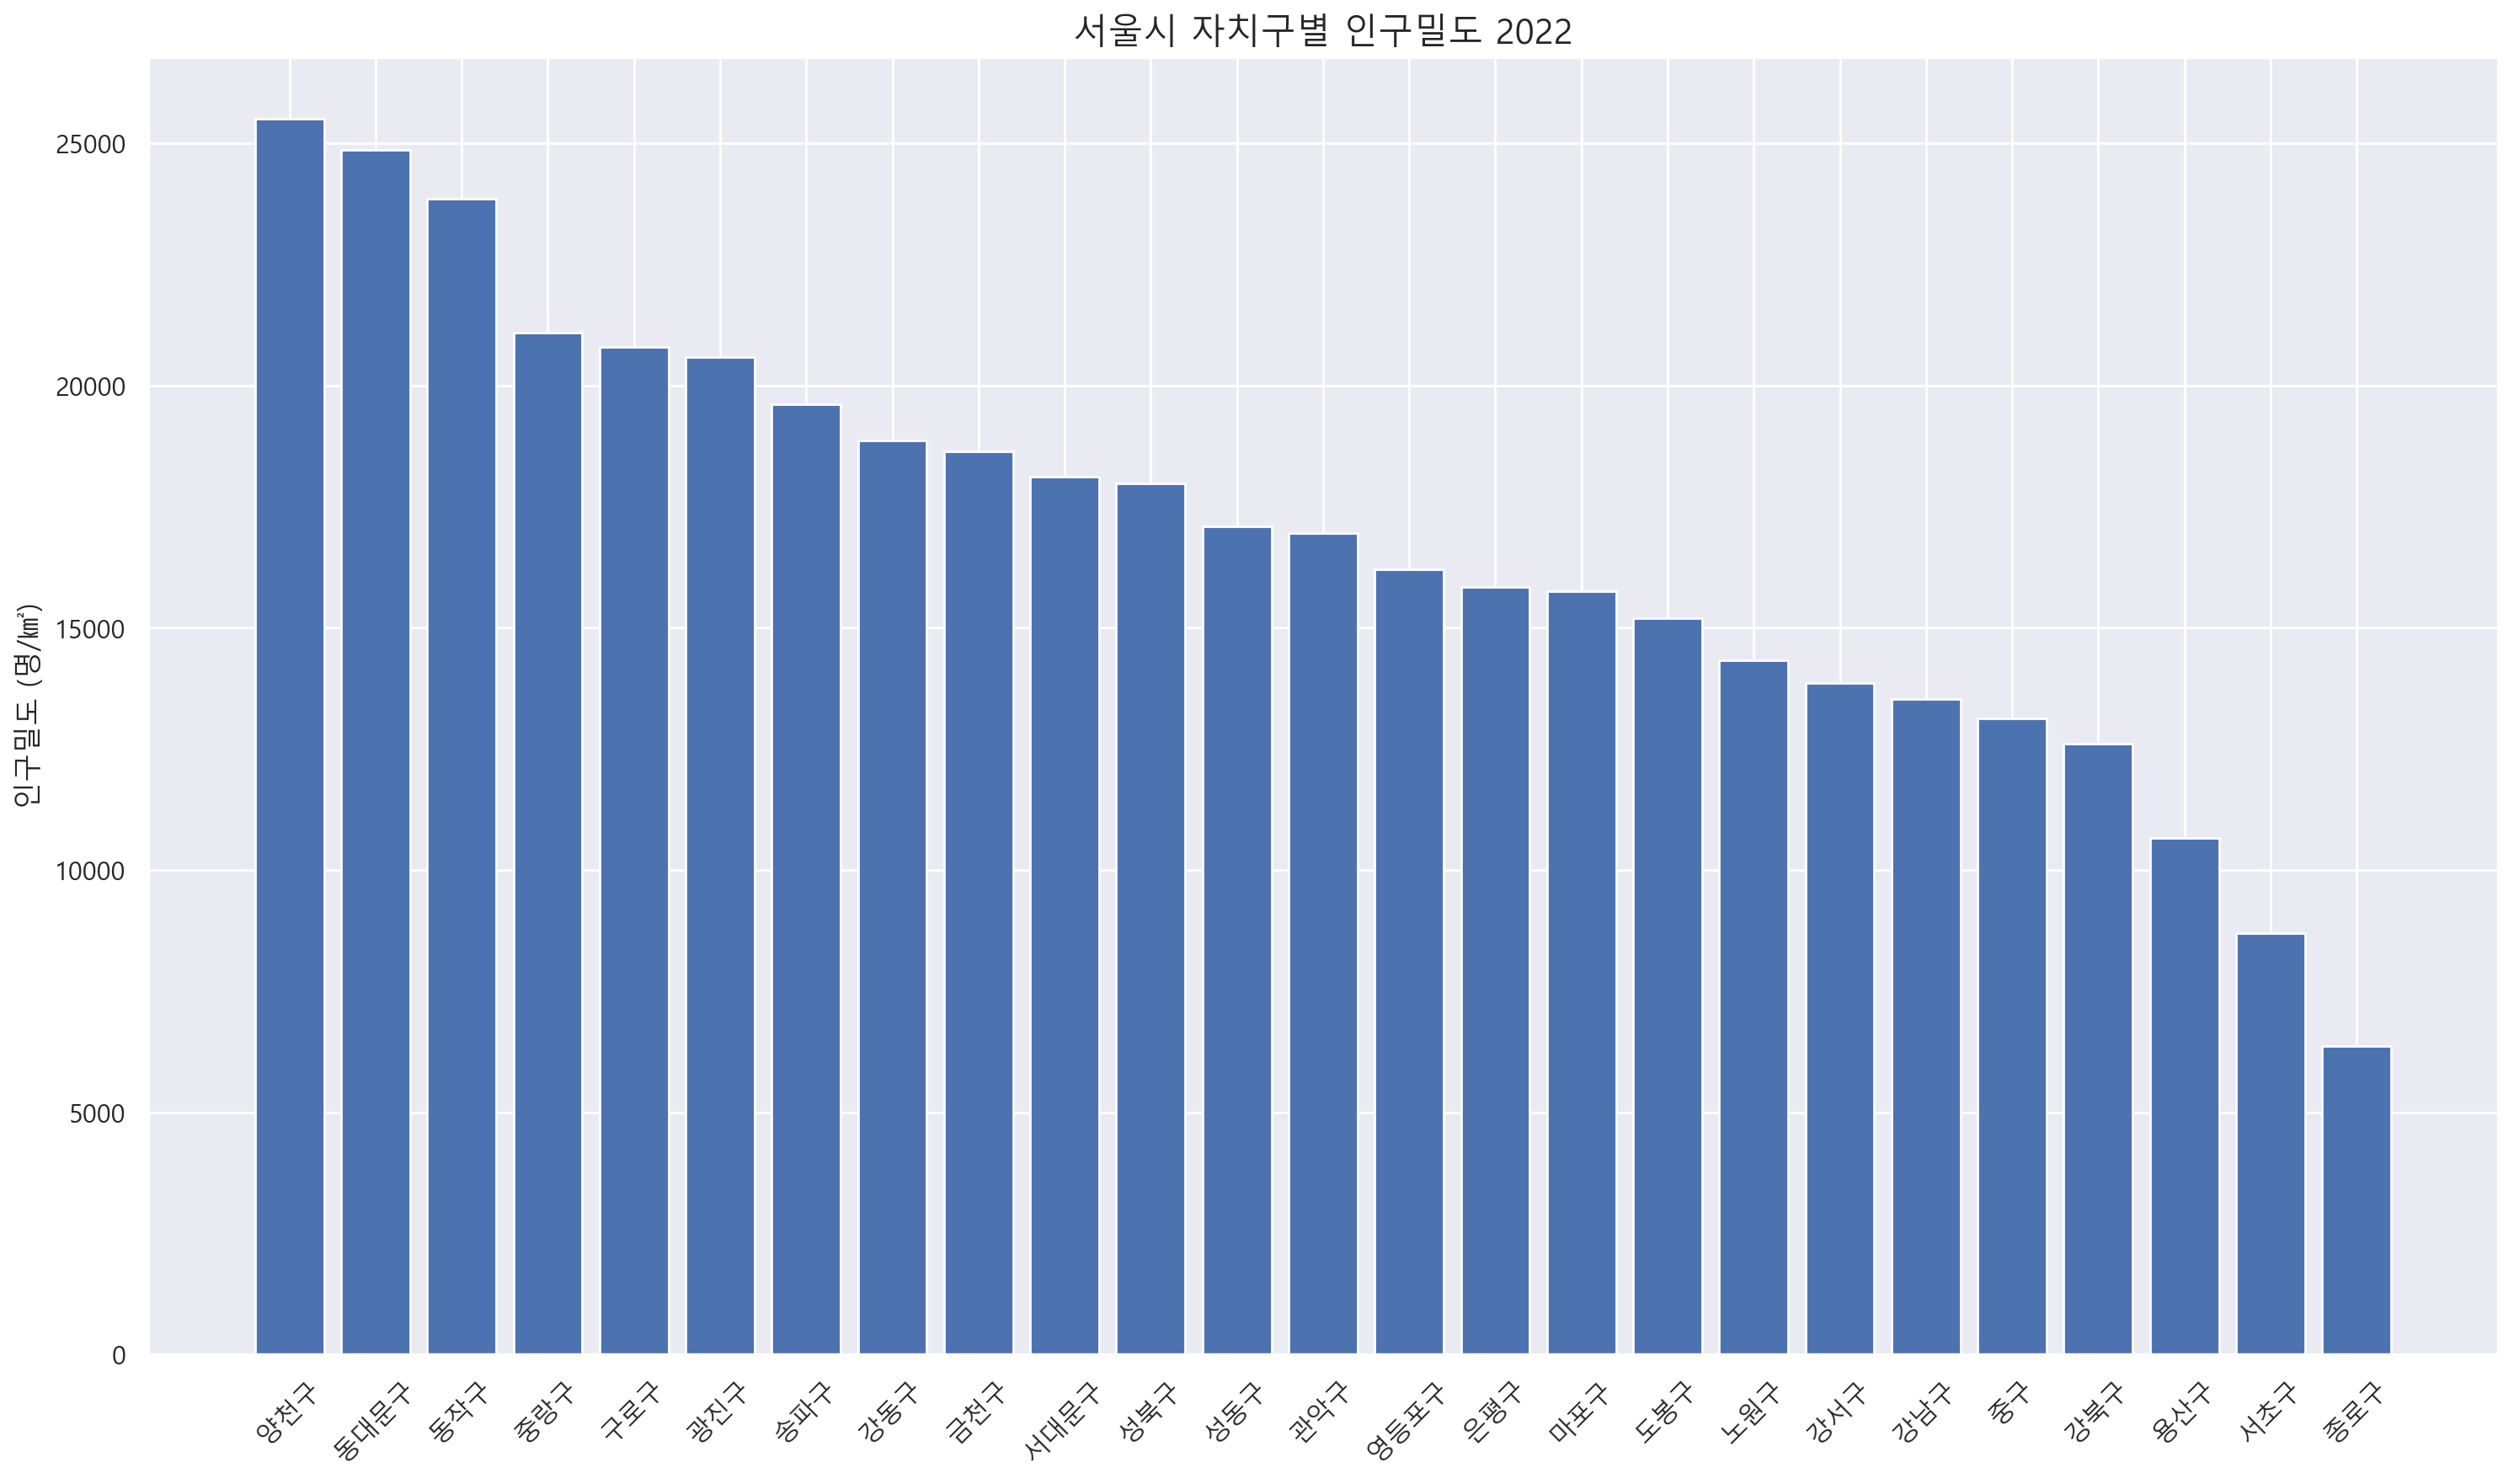

In [50]:
title = '서울시 자치구별 인구밀도 2022'

plt.figure(figsize=(18,10))
plt.bar(gu_df.index, gu_df['인구밀도'])
plt.title(title, size=title_size)
plt.xticks(rotation=45)
plt.ylabel('인구밀도 (명/㎢)')
# plt.savefig(f'../../img/인구/{title}.png')
plt.show()

# 강서구 동별 인구밀도 2022 시각화

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별(1)   2 non-null      object
 1   동별(2)   27 non-null     object
 2   동별(3)   453 non-null    object
 3   2022    453 non-null    object
 4   2022.1  453 non-null    object
 5   2022.2  453 non-null    object
dtypes: object(6)
memory usage: 21.4+ KB


In [15]:
dong_df = df\
    .drop('동별(1)', axis=1)\
    .drop(df[df['동별(2)'] == '소계'].index, axis=0)\
    .iloc[1:, :]\
    .fillna(method='ffill')\
    .set_index(['동별(2)', '동별(3)'], drop=True)

In [16]:
dong_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 451 entries, ('종로구', '소계') to ('강동구', '상일2동')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2022    451 non-null    int64  
 1   2022.1  451 non-null    float64
 2   2022.2  451 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 32.3+ KB


In [17]:
dong_list = [
    '염창동',
    '등촌1동',
    '등촌2동',
    '등촌3동',
    '화곡본동',
    '화곡1동',
    '화곡2동',
    '화곡3동',
    '화곡4동',
    '화곡6동',
    '화곡8동',
    '가양1동',
    '가양2동',
    '가양3동',
    '발산1동',
    '공항동',
    '방화1동',
    '방화2동',
    '방화3동',
    '우장산동',
]

In [18]:
dong_df

2022  2022.1  2022.2
동별(2) 동별(3)                        
종로구   소계     152211   23.91    6366
      사직동      9355    1.23    7606
      삼청동      2642    1.49    1773
      부암동      9536    2.27    4201
      평창동     17858    8.87    2013
...             ...     ...     ...
강동구   천호2동    33825    1.57   21545
      길동      45374    2.17   20910
      강일동     33057    2.26   14627
      상일1동    39178    2.65   14784
      상일2동    11933    0.54   22098

[451 rows x 3 columns]

In [43]:
dong_dense_df = dong_df.loc['강서구', :][['2022.2']][1:].sort_values('2022.2', ascending=False)

In [44]:
dong_dense_df.columns = ['인구밀도']

In [45]:
dong_dense_df.head(1)

,인구밀도
동별(3),
화곡1동,47006


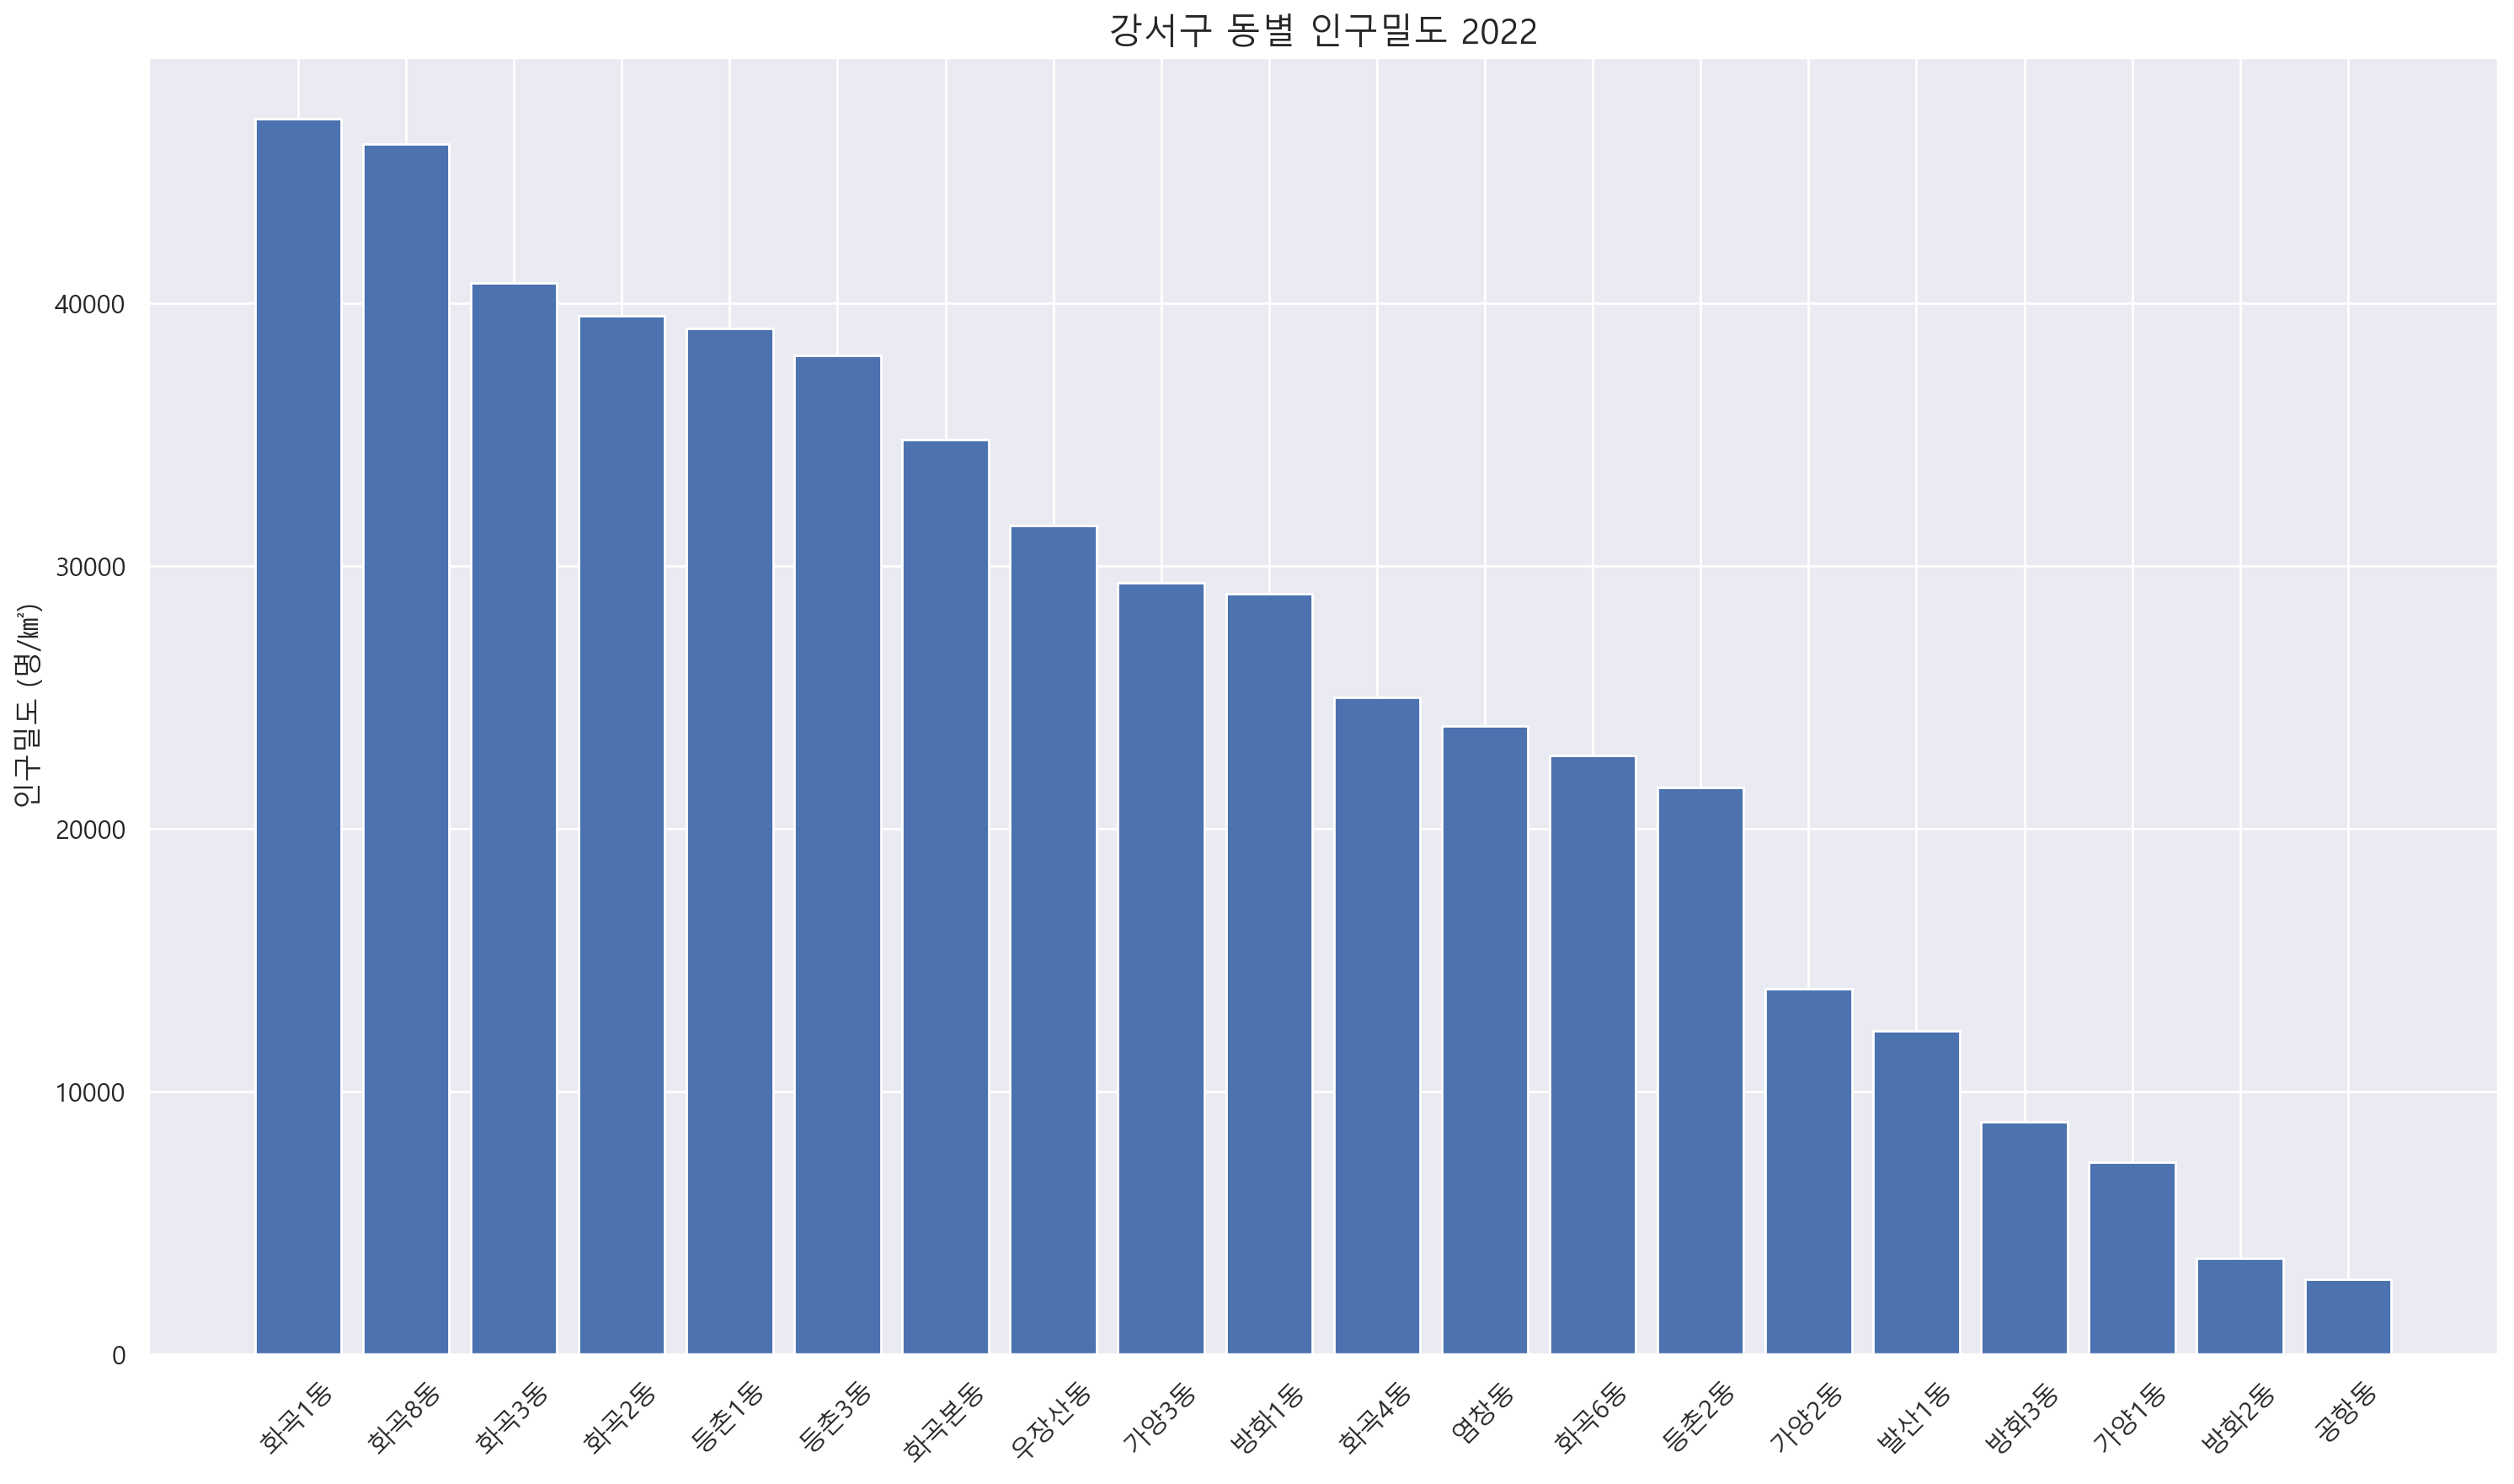

In [46]:
title = '강서구 동별 인구밀도 2022'

plt.figure(figsize=(18,10))
plt.bar(dong_dense_df.index, dong_dense_df['인구밀도'])
plt.title(title, size=title_size)
plt.xticks(rotation=45)
plt.ylabel('인구밀도 (명/㎢)')
plt.savefig(f'../../img/인구/{title}.png')
plt.show()

# 면적 추출

In [20]:
dong_area_df = dong_df.loc['강서구', :][1:][['2022.1']].reset_index()

In [21]:
dong_area_df.columns = ['행정동','면적 (㎢)']

In [22]:
dong_area_df.head()

,행정동,면적 (㎢)
0,염창동,1.74
1,등촌1동,0.64
2,등촌2동,0.92
3,등촌3동,0.79
4,화곡본동,0.98


In [23]:
# dong_area_df.to_csv('강서구 행정동별 면적.csv')